In [1]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [10]:
pil_img = Image.open('test.jpg')
print(pil_img.format, pil_img.size, pil_img.mode)

plt.imshow(pil_img)
plt.axis('off')
plt.show();

JPEG (612, 408) RGB


In [17]:
resized_img = pil_img.resize((100, 100))
cropped_img = pil_img.crop((350, 80, 480, 200))
rotate_img = pil_img.rotate(45)
grayscale_img = pil_img.convert('L')

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(resized_img)
axes[0].set_title('resized_img')
axes[1].imshow(cropped_img)
axes[1].set_title('cropped_img')
axes[2].imshow(rotate_img)
axes[2].set_title('rotate_img')
axes[3].imshow(grayscale_img, cmap='gray');
axes[3].set_title('grayscale_img')

for ax in axes: 
    ax.axis('off')

In [18]:
thumbnail_img = pil_img.copy()
thumbnail_img.thumbnail((128, 128))

thumbnail_img.save('thumbnail.jpg')

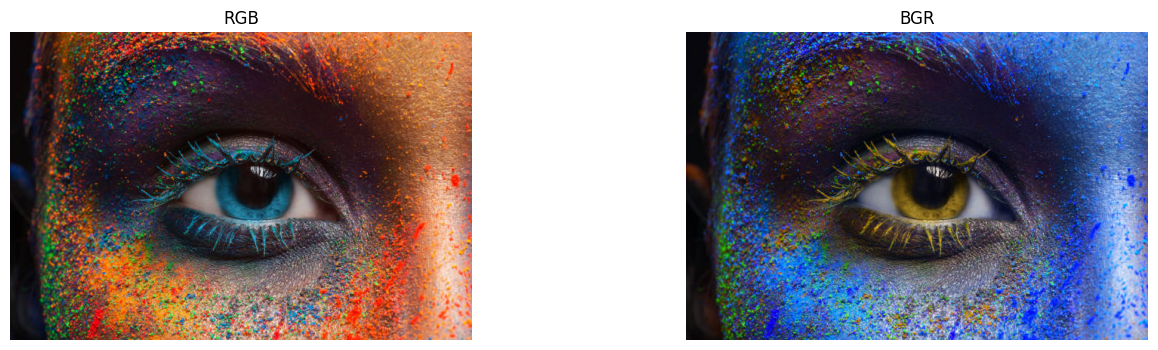

In [23]:
cv2_img = cv2.imread('test.jpg')

cv2_img_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].imshow(cv2_img_rgb)
axes[0].set_title('RGB')
axes[1].imshow(cv2_img)
axes[1].set_title('BGR');

for ax in axes: 
    ax.axis('off')

In [52]:
img_to_draw_on = cv2_img_rgb.copy()

cv2.rectangle(img_to_draw_on, (150, 120), (480, 300), (0, 255, 0), 3)
cv2.putText(img_to_draw_on, 'Eye', (240, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
plt.imshow(img_to_draw_on);
plt.axis('off');

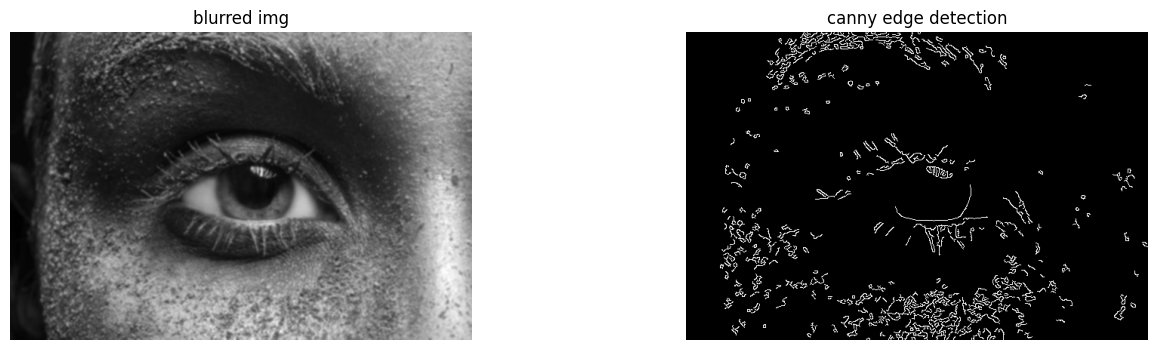

In [54]:
gray_img_cv2 = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img_cv2, (5, 5), 0)

edges = cv2.Canny(blurred_img, threshold1 = 100, threshold2 = 200)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].imshow(blurred_img, cmap='gray')
axes[0].set_title('blurred img')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('canny edge detection');

for ax in axes: 
    ax.axis('off')


### Image preprocessing 

In [85]:
import os 
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2 
import tensorflow as tf
import tensorflow_datasets as tfds 
import matplotlib.image as mpimg 
import skimage 
from skimage import data 
from skimage import transform 


(512, 512, 3)


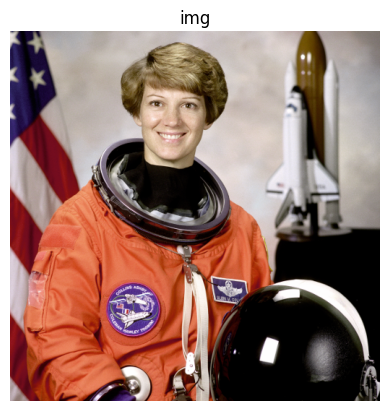

In [ ]:
img = data.astronaut()
print(img.shape)
plt.title('img')
plt.imshow(img);
plt.axis('off');

(512, 1536)


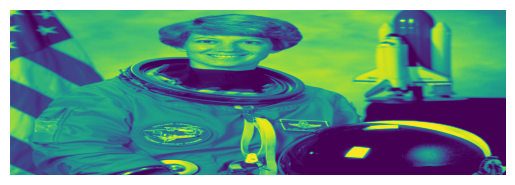

In [68]:
reshaped_img = img.reshape(img.shape[0], -1)

print(reshaped_img.shape)
plt.imshow(reshaped_img)
plt.axis('off');

In [71]:
resized_img = cv2.resize(img, (200, 100), interpolation=cv2.INTER_AREA)
print(resized_img.shape)

plt.imshow(resized_img)

(100, 200, 3)


(100, 200, 3)


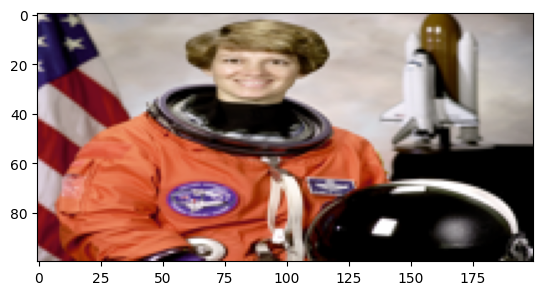

In [74]:
img1 = Image.fromarray(img)
resized_pil_img = img1.resize((200, 100))
resized_img = np.array(resized_pil_img)

print(resized_img.shape)

plt.imshow(resized_img);

In [76]:
img_resized = skimage.transform.resize(img, (100, 300))
plt.imshow(img_resized);

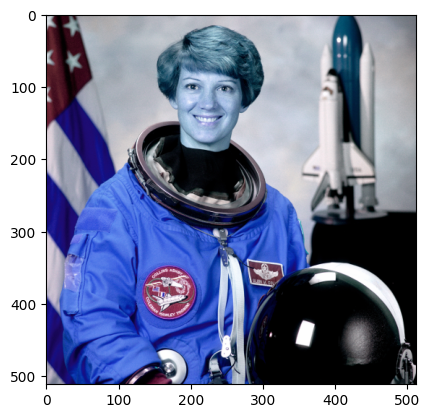

In [78]:
img_bgr = img[:, :, (2, 1, 0)]

plt.imshow(img_bgr);

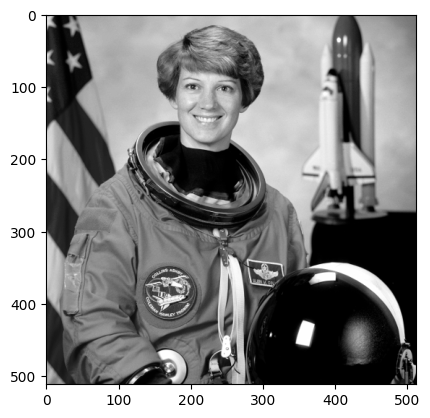

In [82]:
img_gray = skimage.color.rgb2gray(img)
plt.imshow(img_gray, cmap='gray');

### pytorch

In [93]:
img_tensor = v2.ToImage()(img)
pytorch_v2_transforms = v2.Compose([
    v2.ToDtype(torch.uint8, scale = True), 
    v2.RandomResizedCrop(size=(224, 224), antialias = True), 
    v2.RandomHorizontalFlip(p=0.5), 
    v2.ToDtype(torch.float32, scale = True), 
    v2.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    # mean and std are trained from all the images of image net 
])

preprocessed_pytorch_img = pytorch_v2_transforms(img_tensor)
print(preprocessed_pytorch_img.shape, preprocessed_pytorch_img.min(), preprocessed_pytorch_img.max())

torch.Size([3, 224, 224]) tensor(-2.1179) tensor(2.6226)


In [94]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

display_img_pytorch = preprocessed_pytorch_img * std + mean 

display_img_pytorch = display_img_pytorch.clamp(0, 1)

plt.imshow(display_img_pytorch.permute(1, 2, 0).numpy())
plt.axis('off');

### tensorflow 

(224, 224, 3) 0.0 1.0


(-0.5, 223.5, 223.5, -0.5)

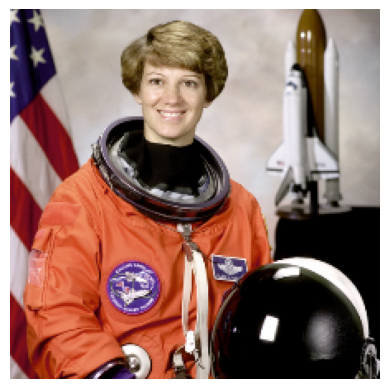

In [100]:
raw_tf_img = tf.convert_to_tensor(np.array(original_img), dtype=tf.float32)
raw_tf_img1 = tf.expand_dims(raw_tf_img, 0)

resized_tf_img = tf.image.resize(raw_tf_img1, [224, 224])
normalized_tf_img_01 = resized_tf_img / 255.0 

normalized_tf_img_neg1_1 = (normalized_tf_img_01 * 2.0) - 1.0
preprocessed_tf_img = normalized_tf_img_01[0]

print(preprocessed_tf_img.shape, preprocessed_tf_img.numpy().min(), preprocessed_tf_img.numpy().max())

plt.imshow(preprocessed_tf_img.numpy());
plt.axis('off')

(224, 224, 3) -1.9884443 2.0426013


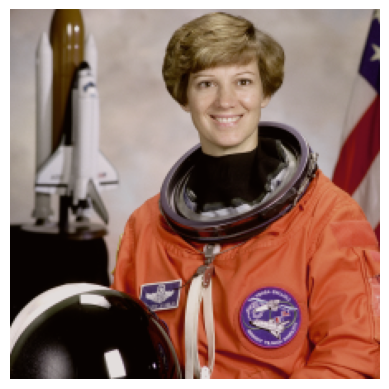

In [104]:
normalizer = tf.keras.layers.Normalization(
    mean = [0.485, 0.456, 0.406], 
    variance = [0.229**2, 0.224**2, 0.225**2], 
    axis = -1
)

tf_pipeline = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256), 
    tf.keras.layers.RandomCrop(224, 224), 

    tf.keras.layers.RandomFlip('horizontal'), 
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.Rescaling(1./255.),
    normalizer
])

augmented_img = tf_pipeline(tf.expand_dims(img, 0))
preprocessed_tf_img = augmented_img[0]

def denormalize(img): 
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    return img*std + mean 

display_img = denormalize(preprocessed_tf_img)
display_img = tf.clip_by_value(display_img, 0.0, 1.0)

print(preprocessed_tf_img.shape, preprocessed_tf_img.numpy().min(), preprocessed_tf_img.numpy().max())

plt.imshow(display_img.numpy())
plt.axis('off');

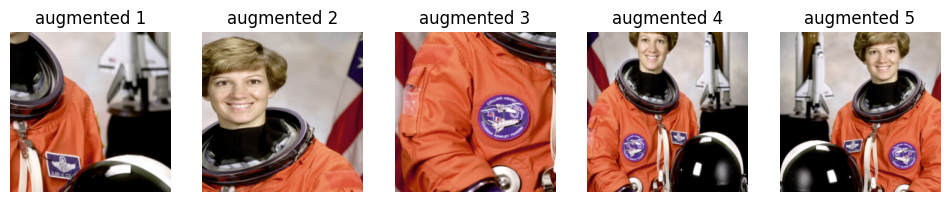

In [107]:
plt.figure(figsize=(12, 6))
for i in range(5): 
    augmented_img_v2 = pytorch_v2_transforms(img_tensor)

    display_img_pytorch = augmented_img_v2 * std + mean 
    display_img_pytorch = display_img_pytorch.clamp(0, 1)

    plt.subplot(1, 5, i+1)
    plt.imshow(display_img_pytorch.permute(1, 2, 0).numpy())
    plt.title(f'augmented {i+1}')
    plt.axis('off');
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


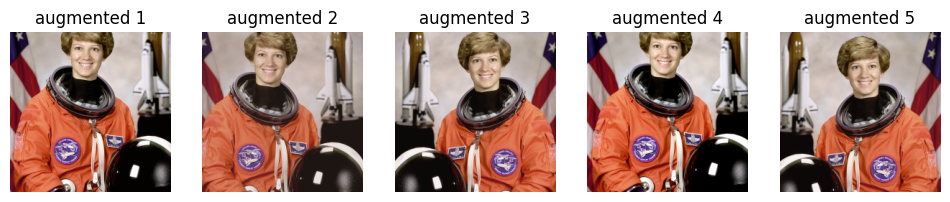

In [109]:
def tensorflow_augment(img_tensor):
    img_tensor = tf.image.resize(img_tensor, [256, 256])
    img_tensor = tf.image.random_crop(img_tensor, size = [224, 224, 3])
    img_tensor = tf.image.random_flip_left_right(img_tensor)
    img_tensor = tf.image.random_brightness(img_tensor, max_delta = 0.2)
    img_tensor = tf.image.random_contrast(img_tensor, lower = 0.8, upper = 1.2)
    img_tensor = img_tensor/255.0 

    return img_tensor 

plt.figure(figsize=(12, 6))
for i in range(5): 
    augmented_img_tf = tensorflow_augment(raw_tf_img)
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_img_tf.numpy())
    plt.title(f'augmented {i+1}')
    plt.axis('off');
plt.show()

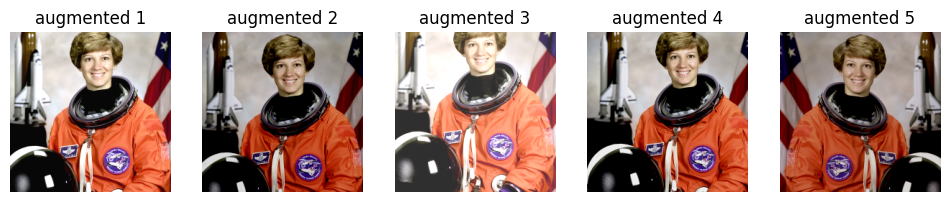

In [112]:
plt.figure(figsize=(12, 6))
for i in range(5): 
    augmented_img_tf = tf_pipeline(tf.expand_dims(img, 0))
    processed_img = augmented_img_tf[0]

    display_img = denormalize(processed_img)
    display_img = tf.clip_by_value(display_img, 0.0, 1.0)

    plt.subplot(1, 5, i+1)
    plt.imshow(display_img.numpy())
    plt.title(f'augmented {i+1}')
    plt.axis('off');
plt.show()

generic pypline elements 

In [ ]:
transforms = v2.Compose([
    v2.ToImage(), 
    v2.Resize(100),
    v2.ToDtype(torch.uint8, scale = True), 
    v2.CenterCrop(256),
    v2.RandomResizedCrop(size=(224, 224), antialias = True), 
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale = True), 
    v2.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [114]:
transforms = v2.Compose([
    v2.ToImage(), 
    v2.Resize(256),
    v2.CenterCrop(256),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale = True), 
    v2.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.CIFAR10(root='./data/Train', download = True, transform = transforms)

100%|██████████| 170498071/170498071 [00:28<00:00, 5897172.55it/s]


Extracting ./data/Train\cifar-10-python.tar.gz to ./data/Train


In [115]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def unnormalize(img_tensor, mean, std): 
    img = img_tensor.clone()
    for t, m, s in zip(img, mean, std): 
        t.mul_(s).add_(m)
    return img 

torch.Size([16, 3, 256, 256]) torch.Size([16])


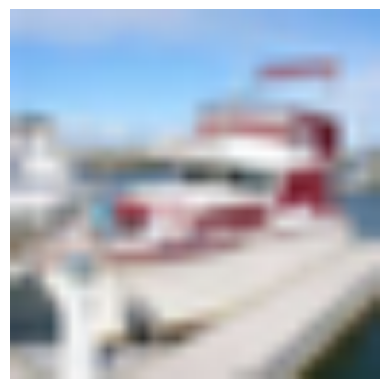

In [118]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16,shuffle=True, num_workers = 2)

img_batch, labels_batch = next(iter(dataloader))

img = img_batch[0]
img = unnormalize(img, mean, std).permute(1, 2, 0)
print(img_batch.shape, labels_batch.shape)
plt.imshow(img)
plt.axis('off');

In [123]:
img = torchvision.utils.make_grid(img_batch)
print(img.shape)
img = np.transpose(img, (1, 2, 0))
img = unnormalize(img, mean, std)
plt.imshow(img)
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 518, 2066])


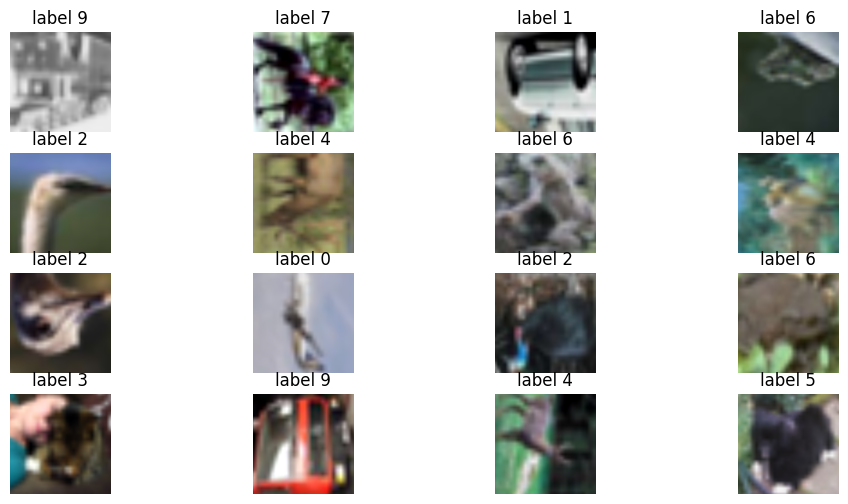

In [135]:
AUTOTUNE = tf.data.AUTOTUNE 

mean = tf.constant([0.485, 0.456, 0.406])
std = tf.constant([0.229, 0.224, 0.225])

(X_train, y_train), _ = tf.keras.datasets.cifar10.load_data()

def preprocess_and_augment(img, label): 
    img_tensor = tf.image.resize(img, [256, 256])
    img_tensor = tf.image.random_crop(img_tensor, size = [224, 224, 3])
    img_tensor = tf.image.random_flip_left_right(img_tensor)
    img_tensor = tf.image.random_brightness(img_tensor, max_delta = 0.2)
    img_tensor = tf.image.random_contrast(img_tensor, lower = 0.8, upper = 1.2)
    img_tensor = tf.image.rot90(img_tensor, k=tf.random.uniform([], 0, 4, dtype = tf.int32))

    img_tensor = tf.cast(img_tensor, tf.float32)/255.0 
    img_tensor = (img_tensor-mean)/std 
    return img_tensor, label

batch_size = 16
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=1000)
train_ds = train_ds.map(preprocess_and_augment, num_parallel_calls = AUTOTUNE)

train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(batch_size)

def unnormalize(img_batch): 
    return tf.clip_by_value((img_batch*std)+mean, 0, 1)

for imgs, labels in train_ds.take(1): 
    img = unnormalize(imgs)
    plt.figure(figsize=(12, 6))
    for i in range(min(batch_size, 16)): 
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.title(f'label {labels[i].numpy()[0]}')
        plt.axis('off')
    plt.show()

In [136]:
def augment_pipeline(img, label): 
    img_tensor = tf.image.resize(img, [256, 256])
    img_tensor = tf.image.random_crop(img_tensor, size = [224, 224, 3])
    img_tensor = tf.image.random_flip_left_right(img_tensor)
    img_tensor = tf.image.random_brightness(img_tensor, max_delta = 0.2)
    img_tensor = tf.image.random_contrast(img_tensor, lower = 0.8, upper = 1.2)
    img_tensor = tf.image.rot90(img_tensor, k=tf.random.uniform([], 0, 4, dtype = tf.int32))

    img_tensor = tf.cast(img_tensor, tf.float32)/255.0 
    img_tensor = (img_tensor-mean)/std 
    return img_tensor, label

def preprocess_pipeline(img, label): 
    img = tf.cast(img, tf.float32)/255.0 
    img = (img-mean)/std
    return img, label 

def load_cifar10_with_pipeline(batch_size=32): 
    (train_ds, test_ds), ds_info = tfds.load(
        'cifar10', 
        split=['train', 'test'], 
        as_supervised = True, 
        with_info = True 
    )

    train_ds = (
        train_ds.map(augment_pipeline, num_parallel_calls=tf.data.AUTOTUNE)
            .shuffle(1000)
            .batch(batch_size)
            .prefetch(tf.data.AUTOTUNE)
    )

    test_ds = (
        test_ds.map(preprocess_pipeline, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(batch_size)
            .prefetch(tf.data.AUTOTUNE)
    )

    return train_ds, test_ds, ds_info 

batch_size = 32 
train_ds, test_ds, info = load_cifar10_with_pipeline(batch_size=batch_size)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ghora\tensorflow_datasets\cifar10\incomplete.665C9U_3.0.2\cifar10-train.tfrecord*...:   0%|…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ghora\tensorflow_datasets\cifar10\incomplete.665C9U_3.0.2\cifar10-test.tfrecord*...:   0%| …

Dataset cifar10 downloaded and prepared to C:\Users\ghora\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


(32, 224, 224, 3) (32,)


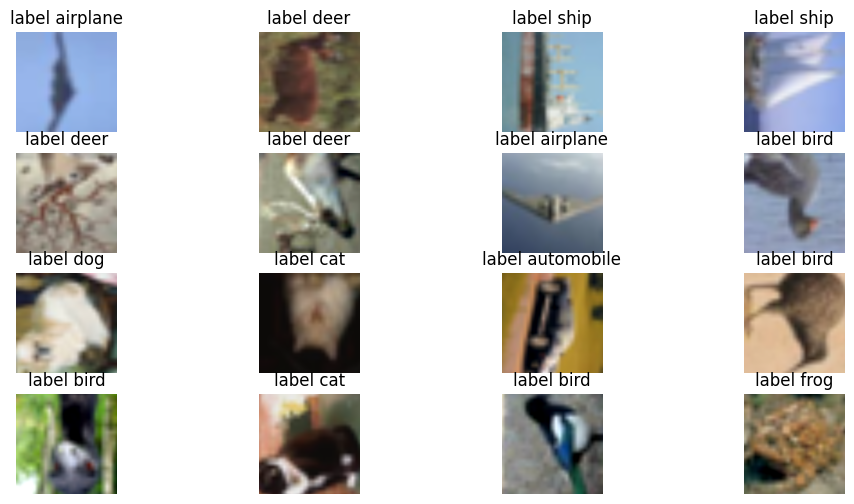

In [137]:
for img, label in train_ds.take(1): 
    print(img.shape, label.shape)


class_name = info.features['label'].names
for img, label in train_ds.take(1): 
    img = unnormalize(img)
    plt.figure(figsize=(12, 6))
    for i in range(min(batch_size, 16)): 
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i].numpy())
        plt.title(f'label {class_name[label[i].numpy()]}')
        plt.axis('off')
    plt.show()

### Transfer Learning 

In [168]:
from torchvision import models 
import copy, time 
from tempfile import TemporaryDirectory
import os, zipfile, pathlib, random 
from torchvision import datasets 
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
from torch import nn 
from tqdm import tqdm
from torch import optim 


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [148]:
data_root = './data'
os.makedirs(data_root, exist_ok = True)
zip_url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
zip_path = f"{data_root}/hymenoptera_data.zip"

# !wget -q -O "$zip_path" "$zip_url"

In [150]:
with zipfile.ZipFile(zip_path, 'r') as zf: 
    zf.extractall(data_root)

data_dir = f'{data_root}/hymenoptera_data'

In [151]:
for split in ["train", 'val']: 
    split_dir = pathlib.Path(data_dir)/split
    for cls in sorted(os.listdir(split_dir)): 
        cls_dir = split_dir/cls
        n = len(list(cls_dir.glob("*")))
        print(f"{cls}: {n} images")

ants: 124 images
bees: 121 images
ants: 70 images
bees: 83 images


c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


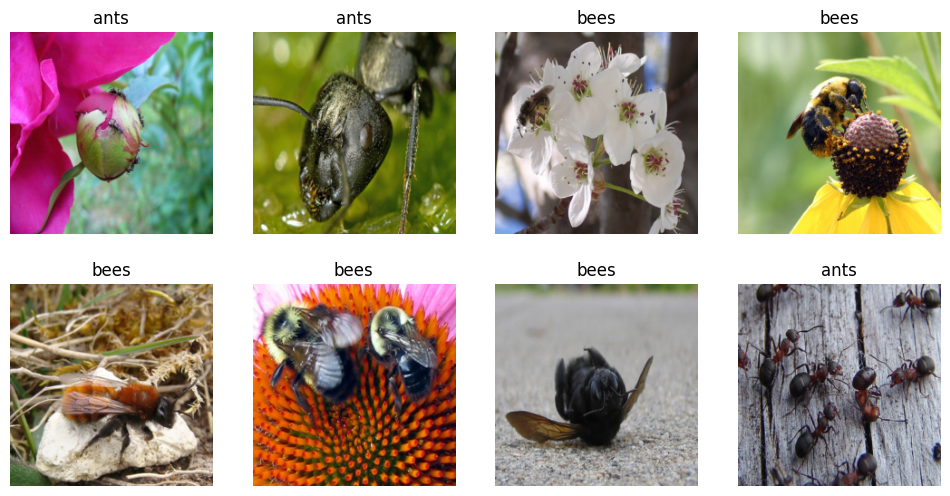

In [160]:
data_transforms = {
    "train": v2.Compose([
        v2.Resize((224, 224)), 
        v2.RandomHorizontalFlip(), 
        v2.ToTensor()
    ]), 
    "val": v2.Compose([
        v2.Resize((224, 224)), 
        v2.ToTensor()
    ])
}

dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform = data_tranforms['train'])
class_names = dataset.classes 

def show_images(dataset, class_names, num_images=8): 
    indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices): 
        img, label = dataset[idx]
        img = img.permute(1, 2, 0)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis('off')
    plt.show()

show_images(dataset, class_names)

In [181]:
def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, device, num_epochs=25): 
    since = time.time()
    history = {
        'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []
    }
    with TemporaryDirectory() as tmpdir: 
        best_model_params_path = os.path.join(tmpdir, 'best_model_params.pt')
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in tqdm(range(num_epochs)): 
            for phase in ['train', 'val']: 
                if phase == 'train': 
                    model.train()
                else : model.eval()

                running_loss, running_corrects = 0.0, 0

                for inputs, labels in dataloaders[phase]: 
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase=='train'): 
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train': 
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0) 
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train': 
                    scheduler.step()

                epoch_loss = running_loss/ dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                history[f'{phase}_loss'].append(epoch_loss)
                history[f'{phase}_acc'].append(epoch_acc.item())
                print(f'{phase} loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                if phase == 'val' and epoch_acc > best_acc: 
                    best_acc = epoch_acc 
                    torch.save(model.state_dict(), best_model_params_path)
            print()
        time_elapsed = time.time()-since 
        print(f'train complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}')

        model.load_state_dict(torch.load(best_model_params_path))
    return model, history

img_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), transform = data_transforms[x])
    for x in ['train', 'val']
}

dataloader = {
    x: DataLoader(img_datasets[x], batch_size=8, shuffle=True, num_workers = 2)
    for x in ['train', 'val']
}
dataset_sizes = {x: len(img_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

{'train': 244, 'val': 153}


In [182]:
model_scratch = models.resnet18(pretrained = False)
num_ftrs = model_scratch.fc.in_features 
model_scratch.fc = nn.Linear(num_ftrs, len(class_names))
model_scratch = model_scratch.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)
scheduler_scratch = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma = 0.1)

model_scratch, history_scratch = train_model(
    model = model_scratch, 
    dataloaders = dataloader, 
    dataset_sizes = dataset_sizes, 
    criterion = criterion, 
    optimizer = optimizer_scratch, 
    scheduler = scheduler_scratch, 
    device = device, 
    num_epochs = 25
)

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
  0%|          | 0/25 [00:00<?, ?it/s]

train loss: 0.6725 Acc: 0.5779


  4%|▍         | 1/25 [00:21<08:37, 21.54s/it]

val loss: 0.8543 Acc: 0.4575

train loss: 0.6807 Acc: 0.5943


  8%|▊         | 2/25 [00:30<05:28, 14.28s/it]

val loss: 0.8726 Acc: 0.5033

train loss: 0.6331 Acc: 0.6311


 12%|█▏        | 3/25 [00:39<04:20, 11.85s/it]

val loss: 0.5548 Acc: 0.7255

train loss: 0.6460 Acc: 0.6270


 16%|█▌        | 4/25 [00:48<03:46, 10.77s/it]

val loss: 0.8593 Acc: 0.6078

train loss: 0.6379 Acc: 0.6516


 20%|██        | 5/25 [00:57<03:20, 10.05s/it]

val loss: 0.5759 Acc: 0.7190

train loss: 0.6200 Acc: 0.6639


 24%|██▍       | 6/25 [01:06<03:03,  9.66s/it]

val loss: 0.7086 Acc: 0.6209

train loss: 0.5652 Acc: 0.7008


 28%|██▊       | 7/25 [01:15<02:49,  9.39s/it]

val loss: 0.4920 Acc: 0.7647

train loss: 0.4980 Acc: 0.7787


 32%|███▏      | 8/25 [01:26<02:51, 10.09s/it]

val loss: 0.5336 Acc: 0.7647

train loss: 0.5133 Acc: 0.7295


 36%|███▌      | 9/25 [01:36<02:36,  9.80s/it]

val loss: 0.6093 Acc: 0.6993

train loss: 0.4920 Acc: 0.7254


 40%|████      | 10/25 [01:44<02:22,  9.53s/it]

val loss: 0.5779 Acc: 0.7386

train loss: 0.4580 Acc: 0.7992


 44%|████▍     | 11/25 [01:54<02:11,  9.39s/it]

val loss: 0.5954 Acc: 0.7190

train loss: 0.4768 Acc: 0.7828


 48%|████▊     | 12/25 [02:03<02:00,  9.27s/it]

val loss: 0.5495 Acc: 0.7843

train loss: 0.4620 Acc: 0.7828


 52%|█████▏    | 13/25 [02:11<01:49,  9.14s/it]

val loss: 0.5332 Acc: 0.7778

train loss: 0.4450 Acc: 0.7869


 56%|█████▌    | 14/25 [02:20<01:39,  9.05s/it]

val loss: 0.5540 Acc: 0.7647

train loss: 0.4481 Acc: 0.7910


 60%|██████    | 15/25 [02:29<01:30,  9.04s/it]

val loss: 0.5577 Acc: 0.7778

train loss: 0.4482 Acc: 0.7787


 64%|██████▍   | 16/25 [02:39<01:22,  9.17s/it]

val loss: 0.5776 Acc: 0.7516

train loss: 0.4556 Acc: 0.7746


 68%|██████▊   | 17/25 [02:49<01:16,  9.56s/it]

val loss: 0.5558 Acc: 0.7712

train loss: 0.4564 Acc: 0.7787


 72%|███████▏  | 18/25 [02:58<01:06,  9.45s/it]

val loss: 0.5744 Acc: 0.7647

train loss: 0.4589 Acc: 0.7992


 76%|███████▌  | 19/25 [03:09<00:57,  9.66s/it]

val loss: 0.5636 Acc: 0.7712

train loss: 0.4726 Acc: 0.7664


 80%|████████  | 20/25 [03:21<00:52, 10.53s/it]

val loss: 0.5732 Acc: 0.7451

train loss: 0.4503 Acc: 0.7992


 84%|████████▍ | 21/25 [03:40<00:52, 13.12s/it]

val loss: 0.5767 Acc: 0.7451

train loss: 0.4108 Acc: 0.8197


 88%|████████▊ | 22/25 [04:01<00:46, 15.52s/it]

val loss: 0.5548 Acc: 0.7712

train loss: 0.4374 Acc: 0.7787


 92%|█████████▏| 23/25 [04:20<00:32, 16.31s/it]

val loss: 0.5610 Acc: 0.7778

train loss: 0.4413 Acc: 0.8033


 96%|█████████▌| 24/25 [04:28<00:14, 14.03s/it]

val loss: 0.5789 Acc: 0.7582

train loss: 0.4493 Acc: 0.8074


100%|██████████| 25/25 [04:37<00:00, 11.11s/it]

val loss: 0.5659 Acc: 0.7582

train complete in 4m 38



C:\Users\ghora\AppData\Local\Temp\ipykernel_9324\4139789164.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [184]:
model_tl = models.resnet18(pretrained = True)
num_ftrs = model_tl.fc.in_features 
model_tl.fc = nn.Linear(num_ftrs, len(class_names))
model_tl = model_tl.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_tl = optim.SGD(model_tl.parameters(), lr=0.001, momentum=0.9)
scheduler_tl = optim.lr_scheduler.StepLR(optimizer_tl, step_size=7, gamma = 0.1)

model_tl, history_tl = train_model(
    model = model_tl, 
    dataloaders = dataloader, 
    dataset_sizes = dataset_sizes, 
    criterion = criterion, 
    optimizer = optimizer_tl, 
    scheduler = scheduler_tl, 
    device = device, 
    num_epochs = 25
)

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
  0%|          | 0/25 [00:00<?, ?it/s]

train loss: 0.4931 Acc: 0.7582


  4%|▍         | 1/25 [00:14<05:42, 14.29s/it]

val loss: 0.3260 Acc: 0.8758

train loss: 0.2822 Acc: 0.8525


  8%|▊         | 2/25 [00:30<06:01, 15.71s/it]

val loss: 0.2119 Acc: 0.9085

train loss: 0.1935 Acc: 0.9057


 12%|█▏        | 3/25 [00:47<05:55, 16.17s/it]

val loss: 0.1959 Acc: 0.9150

train loss: 0.1409 Acc: 0.9467


 16%|█▌        | 4/25 [01:04<05:47, 16.56s/it]

val loss: 0.1946 Acc: 0.9346

train loss: 0.1068 Acc: 0.9672


 20%|██        | 5/25 [01:21<05:31, 16.58s/it]

val loss: 0.2320 Acc: 0.9216

train loss: 0.1359 Acc: 0.9590


 24%|██▍       | 6/25 [01:37<05:13, 16.50s/it]

val loss: 0.1768 Acc: 0.9412

train loss: 0.0429 Acc: 0.9918


 28%|██▊       | 7/25 [01:54<04:57, 16.51s/it]

val loss: 0.1825 Acc: 0.9281

train loss: 0.0790 Acc: 0.9631


 32%|███▏      | 8/25 [02:10<04:38, 16.39s/it]

val loss: 0.1850 Acc: 0.9412

train loss: 0.0697 Acc: 0.9795


 36%|███▌      | 9/25 [02:27<04:25, 16.60s/it]

val loss: 0.2231 Acc: 0.9150

train loss: 0.0362 Acc: 0.9918


 40%|████      | 10/25 [02:43<04:07, 16.47s/it]

val loss: 0.2065 Acc: 0.9216

train loss: 0.0433 Acc: 0.9836


 44%|████▍     | 11/25 [02:59<03:48, 16.35s/it]

val loss: 0.2618 Acc: 0.9150

train loss: 0.0291 Acc: 0.9918


 48%|████▊     | 12/25 [03:16<03:33, 16.43s/it]

val loss: 0.1936 Acc: 0.9412

train loss: 0.0498 Acc: 0.9918


 52%|█████▏    | 13/25 [03:32<03:16, 16.37s/it]

val loss: 0.1878 Acc: 0.9477

train loss: 0.0358 Acc: 0.9959


 56%|█████▌    | 14/25 [03:49<03:03, 16.64s/it]

val loss: 0.2285 Acc: 0.9216

train loss: 0.0293 Acc: 0.9918


 60%|██████    | 15/25 [04:06<02:44, 16.48s/it]

val loss: 0.2042 Acc: 0.9346

train loss: 0.0221 Acc: 1.0000


 64%|██████▍   | 16/25 [04:21<02:25, 16.16s/it]

val loss: 0.2071 Acc: 0.9216

train loss: 0.0605 Acc: 0.9713


 68%|██████▊   | 17/25 [04:37<02:08, 16.07s/it]

val loss: 0.1869 Acc: 0.9412

train loss: 0.0461 Acc: 0.9877


 72%|███████▏  | 18/25 [04:54<01:54, 16.38s/it]

val loss: 0.1928 Acc: 0.9281

train loss: 0.0319 Acc: 0.9918


 76%|███████▌  | 19/25 [05:11<01:39, 16.66s/it]

val loss: 0.1813 Acc: 0.9412

train loss: 0.0426 Acc: 0.9918


 80%|████████  | 20/25 [05:29<01:24, 16.85s/it]

val loss: 0.1806 Acc: 0.9346

train loss: 0.0341 Acc: 0.9959


 84%|████████▍ | 21/25 [05:45<01:06, 16.69s/it]

val loss: 0.2159 Acc: 0.9281

train loss: 0.0382 Acc: 0.9836


 88%|████████▊ | 22/25 [06:01<00:49, 16.47s/it]

val loss: 0.2111 Acc: 0.9281

train loss: 0.0218 Acc: 1.0000


 92%|█████████▏| 23/25 [06:18<00:33, 16.63s/it]

val loss: 0.2224 Acc: 0.9150

train loss: 0.0312 Acc: 0.9918


 96%|█████████▌| 24/25 [06:34<00:16, 16.51s/it]

val loss: 0.2181 Acc: 0.9281

train loss: 0.0112 Acc: 1.0000


100%|██████████| 25/25 [06:50<00:00, 16.44s/it]

val loss: 0.1877 Acc: 0.9412

train complete in 6m 51



C:\Users\ghora\AppData\Local\Temp\ipykernel_9324\4139789164.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


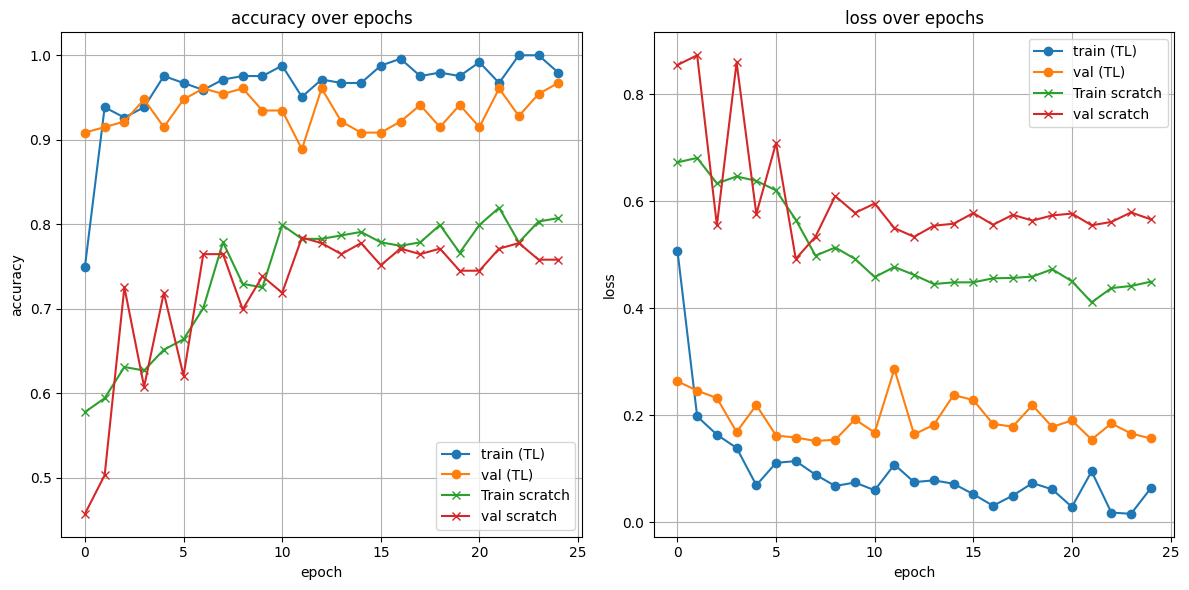

In [183]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_tl['train_acc'], label = 'train (TL)', marker = 'o')
plt.plot(history_tl['val_acc'], label = 'val (TL)', marker = 'o')
plt.plot(history_scratch['train_acc'], label = 'Train scratch', marker = 'x')
plt.plot(history_scratch['val_acc'], label = 'val scratch', marker = 'x')
plt.title('accuracy over epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_tl['train_loss'], label = 'train (TL)', marker = 'o')
plt.plot(history_tl['val_loss'], label = 'val (TL)', marker = 'o')
plt.plot(history_scratch['train_loss'], label = 'Train scratch', marker = 'x')
plt.plot(history_scratch['val_loss'], label = 'val scratch', marker = 'x')
plt.title('loss over epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()